In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

url= 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
house = pd.read_csv(url)
print(house.head())
house.isnull().sum()*100/house.shape[0]

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


,0
price,0.0
area,0.0
bedrooms,0.0
bathrooms,0.0
stories,0.0
mainroad,0.0
guestroom,0.0
basement,0.0
hotwaterheating,0.0
airconditioning,0.0


In [293]:
vars =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

house[vars] = house[vars].apply(binary_map)
house.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [294]:
def gradient_descent(xtrain, ytrain, xtest, ytest, theta, alpha, iterations):
    m = len(ytrain)
    train_cost_history = np.zeros(iterations)
    test_cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = xtrain.dot(theta)
        errors = np.subtract(predictions, ytrain)
        sum_delta = (alpha / m) * xtrain.transpose().dot(errors)
        theta -= sum_delta
        train_cost_history[i] = compute_cost(xtrain, ytrain, theta)
        test_cost_history[i] = compute_cost(xtest, ytest, theta)

    return theta, train_cost_history, test_cost_history

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [295]:

df_train, df_test = train_test_split(house, train_size = 0.8, test_size = 0.2, random_state = 100)
numvars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']


ytrain = df_train.pop('price').values.reshape(-1,1)
xtrain = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
xtrain = np.column_stack((np.ones(xtrain.shape[0]), xtrain))

ytest = df_test.pop('price').values.reshape(-1,1)
xtest = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
xtest = np.column_stack((np.ones(xtest.shape[0]), xtest))


In [307]:
theta = np.zeros((xtrain.shape[1], 1))
iterations = 1500
alpha = 0.1
theta, train_cost_history, test_cost_history = gradient_descent(xtrain, ytrain, xtest, ytest, theta, alpha, iterations)

print('Final Theta: ', theta)
print('Final Train Cost: ', train_cost_history)
print('Final Test Cost: ', test_cost_history)

Final Theta:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Final Train Cost:  [1.11635158e+26 1.07911873e+39 1.04312768e+52 ...            nan
            nan            nan]
Final Test Cost:  [1.14112524e+26 1.10306611e+39 1.06627636e+52 ...            nan
            nan            nan]


/tmp/ipython-input-649612685.py:20: RuntimeWarning: overflow encountered in square
  sqrErrors = np.square(errors)
/tmp/ipython-input-615120099.py:15: RuntimeWarning: invalid value encountered in subtract
  theta = theta - sum_delta


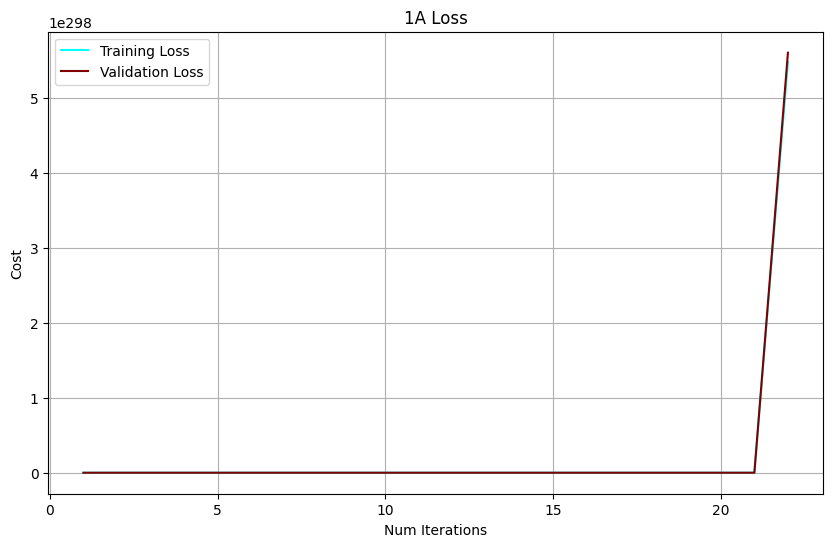

In [297]:
#1A Data Plot
plt.plot(range(1, iterations + 1),train_cost_history, color='cyan', label='Training Loss')
plt.plot(range(1, iterations + 1),test_cost_history, color='maroon', label='Validation Loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Num Iterations')
plt.ylabel('Cost')
plt.title('1A Loss')
plt.legend()
plt.grid(True)
plt.show()

Final Theta Value:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Final Train Cost:  [1.11635158e+26 1.07911873e+39 1.04312768e+52 ...            nan
            nan            nan]
Final Test Cost:  [1.14112524e+26 1.10306611e+39 1.06627636e+52 ...            nan
            nan            nan]


/tmp/ipython-input-649612685.py:20: RuntimeWarning: overflow encountered in square
  sqrErrors = np.square(errors)
/tmp/ipython-input-615120099.py:15: RuntimeWarning: invalid value encountered in subtract
  theta = theta - sum_delta


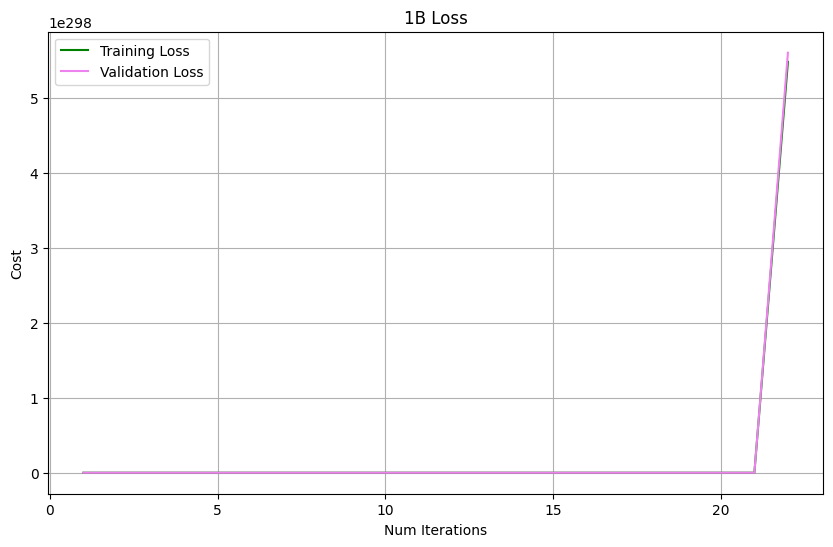

In [306]:
#1B
df_train, df_test = train_test_split(house, train_size = 0.8, test_size = 0.2, random_state = 100)
numvars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea','price']

ytrain = df_train.pop('price').values.reshape(-1,1)
xtrain = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
xtrain = np.column_stack((np.ones(xtrain.shape[0]), xtrain))

ytest = df_test.pop('price').values.reshape(-1,1)
xtest = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
xtest = np.column_stack((np.ones(xtest.shape[0]), xtest))

theta = np.zeros((xtrain.shape[1], 1))
iterations = 1500
alpha = 0.1
theta, train_cost_history, test_cost_history = gradient_descent(xtrain, ytrain, xtest, ytest, theta, alpha, iterations)

print('Final Theta Value: ', theta)
print('Final Train Cost: ', train_cost_history)
print('Final Test Cost: ', test_cost_history)

#1B Loss
plt.plot(range(1, iterations + 1),train_cost_history, color='Green', label='Training Loss')
plt.plot(range(1, iterations + 1),test_cost_history, color='Violet', label='Validation Loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Num Iterations')
plt.ylabel('Cost')
plt.title('1B Loss')
plt.legend()
plt.grid(True)
plt.show()

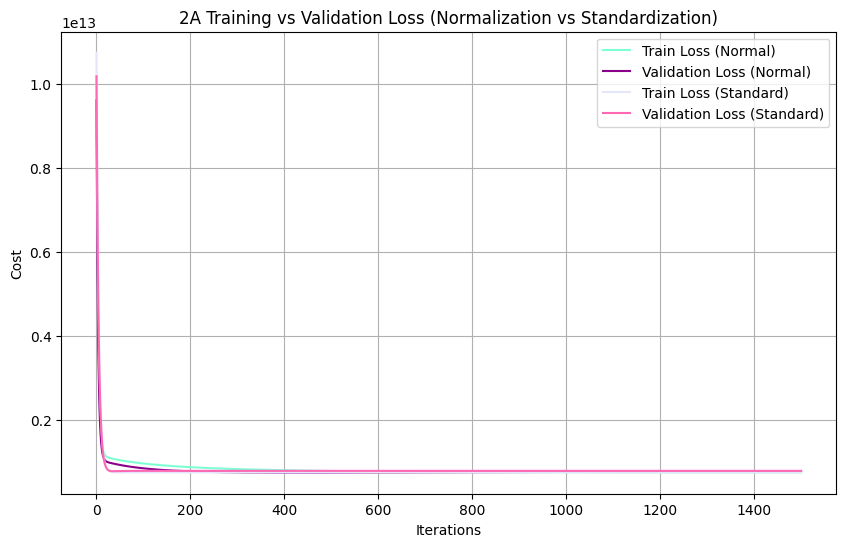

In [299]:
#2A
df_train, df_test = train_test_split(house, train_size = 0.8, test_size = 0.2, random_state = 100)
numvars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

ytrain = df_train.pop('price').values.reshape(-1,1)
ytest  = df_test.pop('price').values.reshape(-1,1)
xtrain = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
xtest  = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]

#Normalization
scaler_norm = MinMaxScaler()
xtrain_norm = scaler_norm.fit_transform(xtrain)
xtest_norm  = scaler_norm.transform(xtest)

xtrain_norm = np.column_stack((np.ones(xtrain_norm.shape[0]), xtrain_norm))
xtest_norm  = np.column_stack((np.ones(xtest_norm.shape[0]), xtest_norm))

theta_norm = np.zeros((xtrain_norm.shape[1], 1))
iterations = 1500
alpha = 0.1
theta_norm, train_cost_norm, test_cost_norm = gradient_descent(xtrain_norm, ytrain, xtest_norm, ytest, theta_norm, alpha, iterations)

#Standarization
scaler_std = StandardScaler()
xtrain_std = scaler_std.fit_transform(xtrain)
xtest_std  = scaler_std.transform(xtest)

xtrain_std = np.column_stack((np.ones(xtrain_std.shape[0]), xtrain_std))
xtest_std  = np.column_stack((np.ones(xtest_std.shape[0]), xtest_std))

theta_std = np.zeros((xtrain_std.shape[1], 1))
iterations = 1500
alpha = 0.1
theta_std, train_cost_std, test_cost_std = gradient_descent(xtrain_std, ytrain, xtest_std, ytest, theta_std, alpha, iterations)

#Data plot for 2A
plt.figure(figsize=(10,6))
plt.plot(range(1, 1501), train_cost_norm, label='Train Loss (Normal)', color='aquamarine')
plt.plot(range(1, 1501), test_cost_norm, label='Validation Loss (Normal)', color='darkmagenta')
plt.plot(range(1, 1501), train_cost_std, label='Train Loss (Standard)', color='lavender')
plt.plot(range(1, 1501), test_cost_std, label='Validation Loss (Standard)', color='hotpink')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('2A Training vs Validation Loss (Normalization vs Standardization)')
plt.legend()
plt.grid(True)
plt.show()



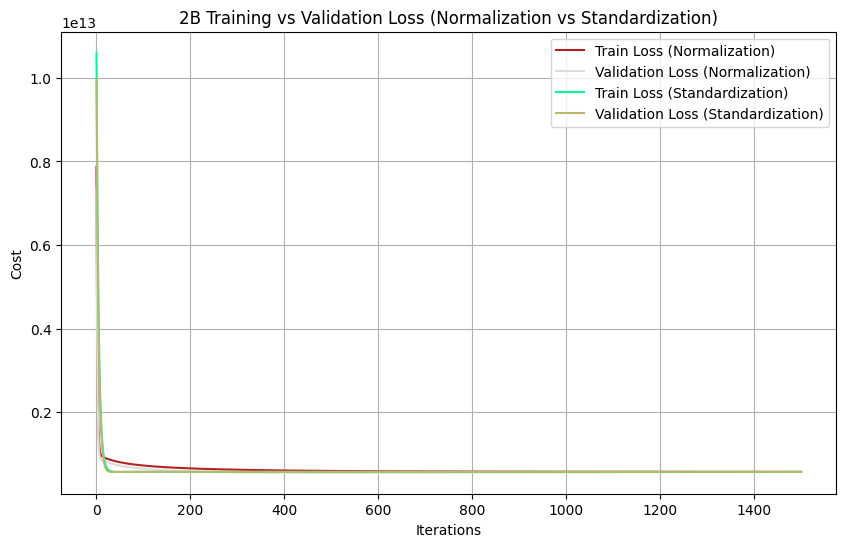

In [300]:
#2B
df_train, df_test = train_test_split(house, train_size = 0.8, test_size = 0.2, random_state = 100)
numvars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea','price']

ytrain = df_train.pop('price').values.reshape(-1,1)
ytest  = df_test.pop('price').values.reshape(-1,1)
xtrain = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
xtest  = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]

#Normalization
scaler_norm = MinMaxScaler()
xtrain_norm = scaler_norm.fit_transform(xtrain)
xtest_norm  = scaler_norm.transform(xtest)

xtrain_norm = np.column_stack((np.ones(xtrain_norm.shape[0]), xtrain_norm))
xtest_norm  = np.column_stack((np.ones(xtest_norm.shape[0]), xtest_norm))

theta_norm = np.zeros((xtrain_norm.shape[1], 1))
iterations = 1500
alpha = 0.1
theta_norm, train_cost_norm, test_cost_norm = gradient_descent(xtrain_norm, ytrain, xtest_norm, ytest, theta_norm, alpha, iterations)

#Standardization
scaler_std = StandardScaler()
xtrain_std = scaler_std.fit_transform(xtrain)
xtest_std  = scaler_std.transform(xtest)

xtrain_std = np.column_stack((np.ones(xtrain_std.shape[0]), xtrain_std))
xtest_std  = np.column_stack((np.ones(xtest_std.shape[0]), xtest_std))

theta_std = np.zeros((xtrain_std.shape[1], 1))
iterations = 1500
alpha = 0.1
theta_std, train_cost_std, test_cost_std = gradient_descent(xtrain_std, ytrain, xtest_std, ytest, theta_std, alpha, iterations)


#Data plot for 2B
plt.figure(figsize=(10,6))
plt.plot(range(1, 1501), train_cost_norm, label='Train Loss (Normalization)', color='firebrick')
plt.plot(range(1, 1501), test_cost_norm, label='Validation Loss (Normalization)', color='gainsboro')
plt.plot(range(1, 1501), train_cost_std, label='Train Loss (Standardization)', color='mediumspringgreen')
plt.plot(range(1, 1501), test_cost_std, label='Validation Loss (Standardization)', color='darkkhaki')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('2B Training vs Validation Loss (Normalization vs Standardization)')
plt.legend()
plt.grid(True)
plt.show()

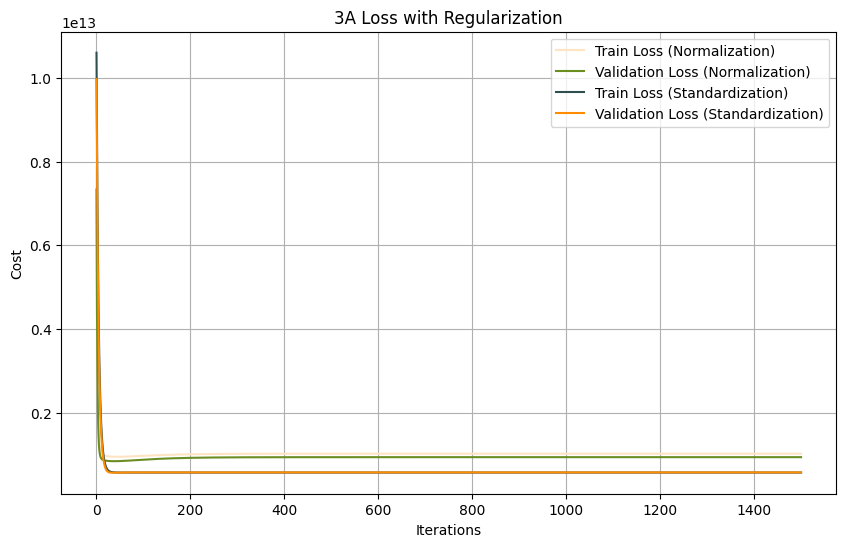

In [301]:
#3A
df_train, df_test = train_test_split(house, train_size = 0.8, test_size = 0.2, random_state = 100)
numvars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

def gradient_descent(xtrain, ytrain, xtest, ytest, theta, alpha, iterations, lam=0.1):
  m = len(ytrain)
  train_cost_history = np.zeros(iterations)
  valid_cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = xtrain.dot(theta)
    errors = np.subtract(predictions, ytrain)
    sum_delta = (alpha / m) * xtrain.transpose().dot(errors)
    sum_delta[1:] += (lam/m) * theta[1:]
    theta = theta - sum_delta
    train_cost_history[i] = compute_cost(xtrain, ytrain, theta)
    valid_cost_history[i] = compute_cost(xtest, ytest, theta)
  return theta, train_cost_history, valid_cost_history

#Normalization
scaler_norm = MinMaxScaler()
xtrain_norm = scaler_norm.fit_transform(xtrain)
xtest_norm  = scaler_norm.transform(xtest)

xtrain_norm = np.column_stack((np.ones(xtrain_norm.shape[0]), xtrain_norm))
xtest_norm  = np.column_stack((np.ones(xtest_norm.shape[0]), xtest_norm))

theta_norm = np.zeros((xtrain_norm.shape[1], 1))
iterations = 1500
alpha = 0.1
lam = 10
theta_norm, train_cost_norm, test_cost_norm = gradient_descent(xtrain_norm, ytrain, xtest_norm, ytest, theta_norm, alpha, iterations, lam)

#Standardization
scaler_std = StandardScaler()
xtrain_std = scaler_std.fit_transform(xtrain)
xtest_std  = scaler_std.transform(xtest)

xtrain_std = np.column_stack((np.ones(xtrain_std.shape[0]), xtrain_std))
xtest_std  = np.column_stack((np.ones(xtest_std.shape[0]), xtest_std))

theta = np.zeros((xtrain_std.shape[1], 1))
iterations = 1500
alpha = 0.1
lam = 0.1
theta_reg, train_cost_reg, test_cost_reg = gradient_descent(xtrain_std, ytrain, xtest_std, ytest, theta, alpha, iterations, lam)

# Plot
plt.figure(figsize=(10,6))
plt.plot(range(1, 1501), train_cost_norm, label='Train Loss (Normalization)', color='bisque')
plt.plot(range(1, 1501), test_cost_norm, label='Validation Loss (Normalization)', color='olivedrab')
plt.plot(range(1, 1501), train_cost_std, label='Train Loss (Standardization)', color='darkslategrey')
plt.plot(range(1, 1501), test_cost_std, label='Validation Loss (Standardization)', color='darkorange')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('3A Loss with Regularization')
plt.legend()
plt.grid(True)
plt.show()

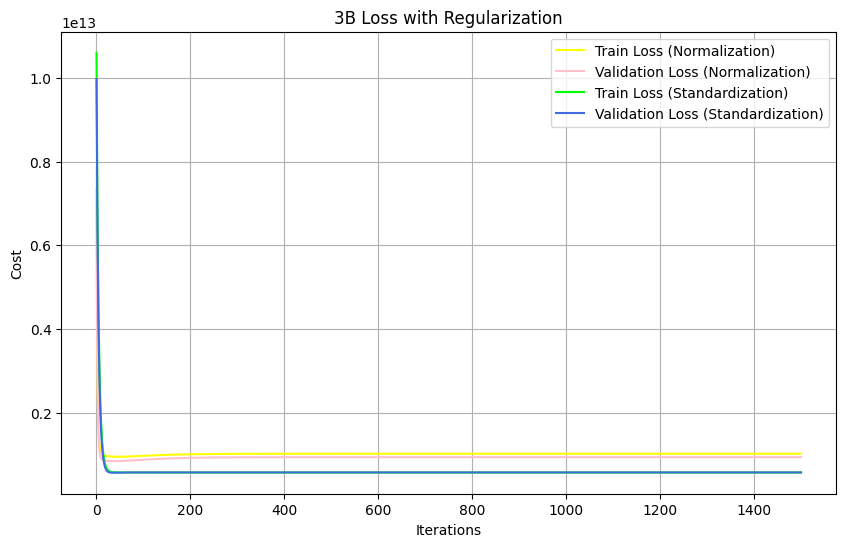

In [302]:
#3B
df_train, df_test = train_test_split(house, train_size = 0.8, test_size = 0.2, random_state = 100)
numvars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea','price']

#Normalization
scaler_norm = MinMaxScaler()
xtrain_norm = scaler_norm.fit_transform(xtrain)
xtest_norm  = scaler_norm.transform(xtest)

xtrain_norm = np.column_stack((np.ones(xtrain_norm.shape[0]), xtrain_norm))
xtest_norm  = np.column_stack((np.ones(xtest_norm.shape[0]), xtest_norm))

theta_norm = np.zeros((xtrain_norm.shape[1], 1))
iterations = 1500
alpha = 0.1
lam = 10
theta_norm, train_cost_norm, test_cost_norm = gradient_descent(xtrain_norm, ytrain, xtest_norm, ytest, theta_norm, alpha, iterations, lam)

#Standarization
scaler_std = StandardScaler()
xtrain_std = scaler_std.fit_transform(xtrain)
xtest_std  = scaler_std.transform(xtest)

xtrain_std = np.column_stack((np.ones(xtrain_std.shape[0]), xtrain_std))
xtest_std  = np.column_stack((np.ones(xtest_std.shape[0]), xtest_std))

theta_std = np.zeros((xtrain_std.shape[1], 1))
iterations = 1500
alpha = 0.1
lam = 10

theta_reg, train_cost_reg, test_cost_reg = gradient_descent(xtrain_std, ytrain, xtest_std, ytest, theta_std, alpha, iterations, lam)

# Plot
plt.figure(figsize=(10,6))
plt.plot(range(1, 1501), train_cost_norm, label='Train Loss (Normalization)', color='yellow')
plt.plot(range(1, 1501), test_cost_norm, label='Validation Loss (Normalization)', color='pink')
plt.plot(range(1, 1501), train_cost_std, label='Train Loss (Standardization)', color='lime')
plt.plot(range(1, 1501), test_cost_std, label='Validation Loss (Standardization)', color='royalblue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('3B Loss with Regularization')
plt.legend()
plt.grid(True)
plt.show()